In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import warnings
from decimal import Decimal
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")

"""**Disease Symptom dataset** was created in a separate python program.
**Dataset scrapping** was done using **NHP website** and **wikipedia data**
"""

# Load Dataset scraped from NHP (https://www.nhp.gov.in/disease-a-z) & Wikipedia
# Scrapping and creation of dataset csv is done in a separate program
df_comb = pd.read_csv("/content/gdrive/MyDrive/dis_sym_dataset_comb.csv", encoding = 'unicode_escape')

# creation of features and label for training the models
X = df_comb.iloc[:, 1:]
Y = df_comb.iloc[:, 0:1]


"""*Train Test Split*"""

# splitting data for training the classifiers and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=34)

# lists used for accuracy plots
accuracy_list = []
cross_accuracy_list = []
model_list = []


# Multinomial NB Classifier
mnb = MultinomialNB()
mnb = mnb.fit(X, Y)
# prediction of labels for the test data
mnb_pred = mnb.predict(x_test)
# calculation of accuracy score based on predictions performed
# converting to Decimal as rounding with float is inaccurate
acc_mnb = round(Decimal(accuracy_score(y_test, mnb_pred) * 100), 2)
accuracy_list.append(acc_mnb)
model_list.append("MNB")
print(f"Accuracy (MNB) : {acc_mnb}%")

# Cross Validation Accuracy MNB
# performing cross validation with 10 different splits
scores_mnb = cross_val_score(mnb, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mnb.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MNB): {score}%")

In [ ]:
# RF Classifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf = rf.fit(X, Y)
# prediction of labels for the test data
rf_pred = rf.predict(x_test)
acc_rf = round(Decimal(accuracy_score(y_test, rf_pred) * 100), 2)
accuracy_list.append(acc_rf)
model_list.append("RF")
print(f"Accuracy (RF) : {acc_rf}%")
# Cross Validation Accuracy RF
# performing cross validation with 10 different splits
scores_rf = cross_val_score(rf, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_rf.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (RF): {score}%")

Accuracy (RF) : 91.84%
Cross Validation Accuracy (RF): 87.90%


In [ ]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=31, weights='distance', n_jobs=4)
knn = knn.fit(X, Y)
# prediction of labels for the test data
knn_pred = knn.predict(x_test)
acc_knn = round(Decimal(accuracy_score(y_test, knn_pred) * 100), 2)
accuracy_list.append(acc_knn)
model_list.append("KNN")
print(f"Accuracy (KNN) : {acc_knn}%")
# Cross Validation Accuracy KNN
# performing cross validation with 5 different splits
scores_knn = cross_val_score(knn, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_knn.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (KNN): {score}%")

Accuracy (KNN) : 92.36%
Cross Validation Accuracy (KNN): 86.66%


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 31)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

  

  

0.8592848904267589

In [ ]:
# LR Classifier
lr = LogisticRegression()
lr = lr.fit(X, Y)
# prediction of labels for the test data
lr_pred = lr.predict(x_test)
acc_lr = round(Decimal(accuracy_score(y_test, lr_pred) * 100), 2)
accuracy_list.append(acc_lr)
model_list.append("LR")
print(f"Accuracy (LR) : {acc_lr}%")

Accuracy (LR) : 91.35%


In [ ]:
# Cross Validation Accuracy LR
# performing cross validation with 5 different splits
scores_lr = cross_val_score(lr, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_lr.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (LR): {score}%")

Cross Validation Accuracy (LR): 89.87%


In [ ]:
# DT Classifier
dt = DecisionTreeClassifier()
dt = dt.fit(X, Y)
# prediction of labels for the test data
dt_pred = dt.predict(x_test)
acc_dt = round(Decimal(accuracy_score(y_test, dt_pred) * 100), 2)
accuracy_list.append(acc_dt)
model_list.append("DT")
print(f"Accuracy (DT) : {acc_dt}%")

# Cross Validation Accuracy DT
# performing cross validation with 5 different splits
scores_dt = cross_val_score(dt, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_dt.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (DT): {score}%")

Accuracy (DT) : 92.36%
Cross Validation Accuracy (DT): 86.61%


In [ ]:
# SVM Classifier
svm = SVC()
svm = svm.fit(X, Y)
# prediction of labels for the test data
svm_pred = svm.predict(x_test)
acc_svm = round(Decimal(accuracy_score(y_test, svm_pred) * 100), 2)
accuracy_list.append(acc_svm)
model_list.append("SVM")
print(f"Accuracy (SVM) : {acc_svm}%")

# Cross Validation Accuracy SVM
# performing cross validation with 5 different splits
scores_svm = cross_val_score(svm, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_svm.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (SVM): {score}%")

Accuracy (SVM) : 91.26%
Cross Validation Accuracy (SVM): 88.27%


In [ ]:
# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='tanh', solver='adam', max_iter=100)
mlp = mlp.fit(X, Y)
# prediction of labels for the test data
mlp_pred = mlp.predict(x_test)
acc_mlp = round(Decimal(accuracy_score(y_test, mlp_pred) * 100), 2)
accuracy_list.append(acc_mlp)
model_list.append("MLP")
print(f"Accuracy (MLP) : {acc_mlp}%")

# Cross Validation Accuracy MLP
# performing cross validation with 5 different splits
scores_mlp = cross_val_score(mlp, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mlp.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MLP): {score}%")

Accuracy (MLP) : 92.42%
Cross Validation Accuracy (MLP): 89.73%


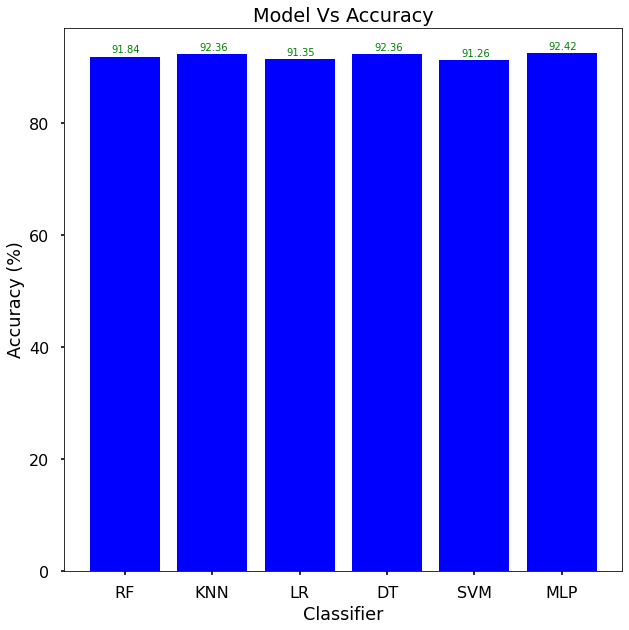

In [ ]:
# comparison plot for all classifiers with their accuracy
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("Model Vs Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, accuracy_list, color='blue')
for i, j in enumerate(accuracy_list):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='green')
plt.show()

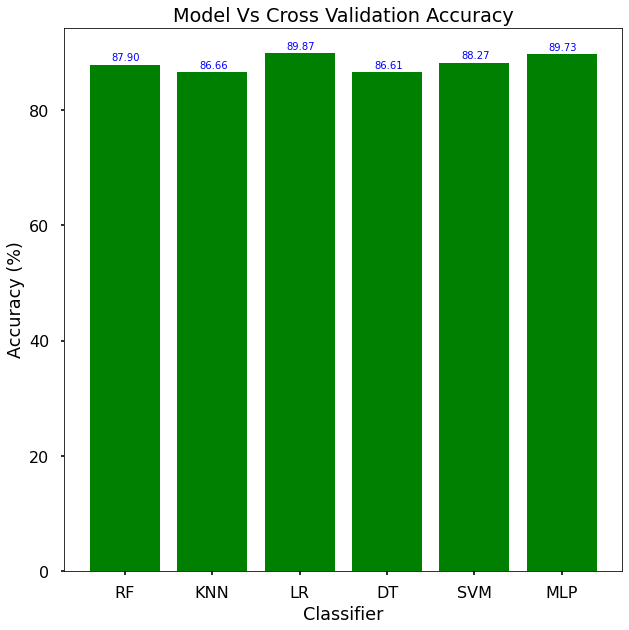

In [ ]:
# comparison plot for all classifiers with their accuracy
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("Model Vs Cross Validation Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, cross_accuracy_list, color='green')
for i, j in enumerate(cross_accuracy_list):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
plt.show()